
# CSCE633 Fall 2022 (Total 100 pts)

**Machine Learning**

**Homework 1**

Instructor: Yoonsuck Choe

Sep 9, 2022


---



**Student name:** Mukherjee,Debajoy


---

# Common instructions (Read carefully)


**Submission:**

1. After you complete each section, "Save and pin" the revision. (**File -> Save and pin revision**). 
> There will be a 20-point penalty for not including revision history in the submission as instructed below.
2. When you're ready to submit, 
> 1. download the ipynb file (**File -> Download .ipynb**).
> 2. take screenshot of revision history, by comparing each successive pinned revisions (there will be several of these: final vs. latest pin, latest pin vs. previous pin, etc.). (**File -> Revision history**, then click on the radio buttons for pinned revisions to compare. Scroll down to the part that shows the major revised part, and take a screenshot. No need to show the entire revision history.)
>> Important: Unselect "[ ] Show output" to suppress diff of execution outputs.
>> Jupyter notebook: If you're using Jupyter notebook on your local machine, run %history -g -f filename.log  and submit the log file. 
> 3. submit a zip file **lastname-firstname.zip** containing the ipynb file and all revision screenshots.

**Using the markdown language in the "text" boxes:**

Note: See https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0 for how to use the markdown when writing your answer in the text boxes.


# Section I. Supervised Learning (15 pt)

**Problem 1 (Written: 6 pts):**
Theorem: [Haussler, 1988] If the hypothesis space $H$ is finite, and $D$ is a sequence of $m \ge 1$ independent random examples of some target concept $c$, then for any $0 \le \epsilon \le 1$, the probability that the version space with respect to $H$ and $D$ is not $\epsilon$-exhausted (with respect to c) is less than

$$|H|e^{-\epsilon m}$$

This bounds the probability that any consistent learner will output a hypothesis $h$ with $error(h) \ge \epsilon$. If we want this probability to be below $\delta$

$$|H|e^{-\epsilon m} \le \delta \tag{1}$$  

then

$$m \ge \frac{1}{\epsilon}(ln(H) + ln(\frac{1}{\delta})) \tag{2}.$$

Discuss how m increases or decreases as $\epsilon$ and $\delta$ change.

> - | Mark one choice | Discuss the implications
>--- | --- | --- 
>If $\epsilon$ increases | then $m$ will ($\uparrow$,  $\downarrow)$ |
>If $\delta$ increases | then $m$ will ($\uparrow$, $\downarrow$) |
>Given a fixed $m$, if $\delta$ decreases | then $\epsilon$ must either ($\uparrow$,  $\downarrow$) |



**Answer:**
We know according to the above theorem 
$$m>= 1/{ϵ} * (ln|H| + ln (1/δ))$$ so 

a. Implication: when ϵ increases then true error is increased which technically means we can achieve that with lesser required samples, so bound on m decreases. So m $\downarrow$ . Mathematically epsilon increases so 1/ϵ decreases so m decreases.

b. Implication: When δ ⇑ then obviously we relax failure rate, so the bound on m should lessen. So m ↓ when δ ⇑. Also we can see from the equation 2, when δ ⇑ then 1/δ ↓ hence |H| and ϵ remaining constant m ↓.

c. Implication: From equation 1, we see if m is fixed and |H| is fixed ϵ ⇑ when δ ↓. if δ decreases with same m, this means with same no of examples we should get a stricter failure rate so true error must increase to nullify the strictness. Ideally if δ increases we would fail to maintain a low true error.



**Problem 2 (Written: 9 pts):**

Mark the correct choice. When $VC(H)$ increases,

(1) Representational power of the hypothesis class (increases, decreases).

(2) Sample complexity (increases, decreases).

(3) Explain why the two (representational power and sample complexity) pose a trade-off (improving one worsens the other).

Hint: Representational power of a hypothesis class relates to how complex it is, and how complex the data can be which it can handle. For example, a hypothesis class that is a set of linear boundaries has less representational power than a set of arbitrary contours as a decision boundary.   


**Answer:**

(1) Representational power increases with increase in VC dimention as more tunable parameters helps us to scatter more points and hence better representational power. For eg. a spline with a higher VC dimention than a line i.e > 3 tuned on 12 points has more tunable parameters than a linear boundary and better representation power.

(2) We know m>=1/ϵ(4 log(2/δ) + 8VC(H)log13/ϵ).
Clearly when VC increases m increases, intuitively for training higher no of tunable parameters we need more data.

(3) So using the formulae used in question 2, we can see increasing the VC dimention, increases sample complexity and increasing VC dimention also increases representation power. This is the trade off.

Basically, when we try to increase the complexity of the model i.e VC dimention has to increase we need more samples, so more computational power which is bad and sample complexity increases.

Similarly if we try to restrict the no of samples i.e if sample complexity ↓ then VC dimention needs to reduce,if ϵ and δ are constants, which means representation power ↓, that is bad.


# Section II. Perceptron (10 pt)

**Problem 3 (Written: 10 pts):** Consider the data set in the table below.

(1) Can a single perceptron unit (assume it takes inputs x, y, and has a bias unit, and it outputs a single value as output) learn the following training set without error?
First, plot the data to see the class boundaries. Try plotting it on paper by hand, and then do something like this in Python:


    x = np.array([0, 0, 0, 0, 1, 1, 1, ...])   	# vector containing x

    y = np.array([0, 1, 2, 3, 0, 1, 2, ...])  	# vector containing y

    c = np.array([0, 0, 0, 0, ..... ])	# vector containing class

    plt.plot(.... "o"  .... "x")    # plot -- hint, use x[c==1] , y[c==0], etc. 

    See below for functioning example code (below that "Answer" cell).

(2) Can a two layer perceptron correctly classify the following training set without error (assuming we can train the weights correctly) with two hidden units? Can it with three hidden units? Can it with four hidden units? Explain why or why not.

> TABLE

>|   x |   y |   class |
>|----:|----:|--------:|
>|   0 |   0 |       0 |
>|   0 |   1 |       0 |
>|   0 |   2 |       0 |
>|   0 |   3 |       0 |
>|   0 |   4 |       0 |
>|   1 |   0 |       0 |
>|   1 |   1 |       0 |
>|   1 |   2 |       1 |
>|   1 |   3 |       0 |
>|   1 |   4 |       0 |
>|   2 |   0 |       0 |
>|   2 |   1 |       1 |
>|   2 |   2 |       1 |
>|   2 |   3 |       1 |
>|   2 |   4 |       0 |
>|   3 |   0 |       0 |
>|   3 |   1 |       0 |
>|   3 |   2 |       1 |
>|   3 |   3 |       0 |
>|   3 |   4 |       0 |
>|   4 |   0 |       0 |
>|   4 |   1 |       0 |
>|   4 |   2 |       0 |
>|   4 |   3 |       0 |
>|   4 |   4 |       0 |

**Answer:**

Either attach a hand-drawn image here, or type in the code below. Then, illustrate your answer.

(1) Clearly the data is not linearly seperable, so a single unit cannot classify the data.

(2) No a 2 layered perceptron with 2 hidden units cannot classify this as with right weights as it at best produce a linear classifier. Similarly a 3 hidden units can plot 3 lines, so its still not able to. But 4 hidden units can classify, since 4 lines are enough. So for a perceptron we basically get constrain relations as we use sign function so 4 units means 4 hyperplanes and hence they will be able to seperate.



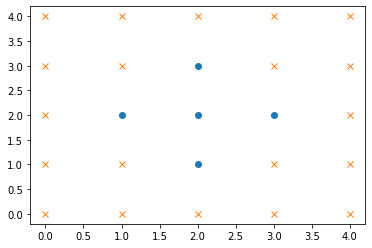

In [ ]:
# You can type in the code here for plotting the data above. Replace the array below with the data in the array above.
#
# Make sure how you understand how to  turn the table above into a plot like this, manually.
# Here's an example:
# x  y   c
# -  -  ---
# 0  0  0  ---> x,y coordinate = (0, 0) : mark this as 'x'
# 1  5  1  ---> x,y coordinate = (1, 5) : mark this as 'o'
# 2  1  0  ... etc
# 3  2  1

# import some necessary packages
import numpy as np
import matplotlib.pyplot as plt

'''x = np.array([0, 1, 2, 3])
y = np.array([0, 5, 3, 2])
c = np.array([0, 1, 0, 1])
'''
x = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
y = np.array([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4])
c = np.array([0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0])
plt.plot(x[c == 1], y[c == 1], 'o', x[c == 0], y[c == 0], 'x')


# Section III. Gradient Descent (30 pt)

**Problem 4 (Written: 5 pts):** Given an error function 
$$E(w) = \frac{1}{40}w(w+1)(w-8)(w-10),$$
find:
$$\frac{\partial E(w)}{\partial w}.$$
Note that this is simply an ordinary derivative $\frac{dE}{dw}$. Do not use Wolfram Alpha or similar package.

**Answer:**

$\frac{\partial E(w)}{\partial w} = 1/40( (w+1)(w-8)(w-10)+(w)(w-8)(w-10) + (w)(w+1)(w-8) + w(w+1)(w-10))$
 
=$1/40(4w^3-51w^2+124w+80)$

This is using multiplication rule of derivative and 
$\frac{∂(x+constant)}{∂x}$ = 1

**Problem 5 (Written: 5 pts):**
(1) How many minima does $E(w)$ have? You can draw a rough plot from $w=-4$ to $12$. (2) Which is/are the local minimum/minima that isn't/aren't a global minimum? (3) How can we set the value of initial $w$, so that $w$ can converge to the local minimum/minima discussed in (2)?

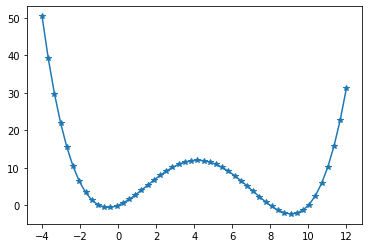

In [ ]:
# Example: modify the function
def E_test(w):
    return 1/40*(w)*(w+1)*(w-8)*(w-10)


w = np.linspace(-4, 12, 50)

# IMPLEMENT : for the problem 4 function, use the following range:
# w = np.linspace(-4,12,50)
plt.plot(w, E_test(w), '*-')


**Answer:**

(1) In the range -4 to 12, w has 2 local minimum

(2) The minimum between -2 and 0 is a local minimum which is not global minimum i.e 0.55. Clearly the minimum between 8 and 10 is global minimum i.e 9.18.

(3) If we set the initial value anything between -4 and the local minimum i.e 0.55 or local minimum to peak which is approx at 4, then it will descend and get trapped in the local minimum using gradient descent.

**Problem 6 (Written: 5 pts):** With $\frac{\partial E(w)}{\partial w}$ calculated above, if you want to adjust $w$ to minimize $E(w)$, what should $\Delta w$ be (include the learning rate $\eta$)? Write the answer as a polynomial function of $w$. (This is trivial, given the answer to problem 4. Be careful with the sign.)

Answer: 

$\Delta w$ = $-η\frac{dE(w)}{dw}$

**Problem 7 (Program: 10 pts):**
Using the gradient found above, write a short program to

1. Initialize $w$ to a particular value $w_0=...$.

2. Repeat
$$w \leftarrow w + \Delta w $$ for 1000 steps. Set $\eta = 0.1$.

3. If you plot the function within a range of -4 and 12, you can see the shape the best(this is important: otherwise it is a bit hard to interprete the results). See the example below and the sample code.  

4. Try different initial value $w_0$ and confirm that the final $w$ values are the same for those that end up in the same local/global minumum. Give two examples $w$ values that lead to a local minumum, and two that lead to the global minumum.

In [ ]:
# Implement your program here:

# Example program. You can modity/extend this.
#
# 1. define function
# - this is an example (quadratic function) -- you should change it to the function given in problem 4)
# - also, you need to check for the termination condition, rather than using a fixed number of steps.
def E(w):
    # note: np.power() can take scalar or vector as argument.
    return 1/40*(w)*(w+1)*(w-8)*(w-10)

# 2. define derivative function
def dEdw(w):
    return 1/40*(4*np.power(w,3)-51*np.power(w,2)+124*w+80)

# 3. gradient descent
w = -1 # initial value
eta = 0.1   # learning rate  : try eta = 0.2 , and eta=0.001
n = 1000

w_t = np.zeros(n)
Ew_t = np.zeros(n)

end_idx = 0
def plot(w,eta,n,w_t=w_t,Ew_t=Ew_t):

  for i in range(n):


    # collect w_t and Ew_t values for plotting
    w_t[i] = w
    Ew_t[i] = E(w)

    end_idx = i  # book keeping

    # IMPLEMENT the line below: gradient descent step
    # DeltaW = ....
    # w = w + DeltaW
    w = w - eta*dEdw(w)


# 4. plot E(w) and the gradient descent steps
    x = np.linspace(-4, 12, 50)

# For the problem 4 function, use
# x = np.linspace(-4,12,50)

# Note: initially, this will only show one point, at w=0.5.
    plt.plot(x, E(x), '-', w_t[0: end_idx], Ew_t[0:end_idx], '*-')


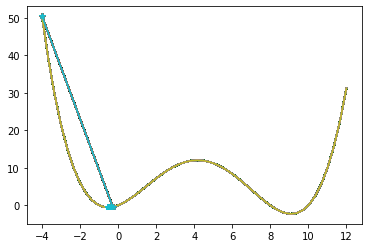

In [ ]:
'''arguments'''
w = -4
eta = 0.1
n = 1000
plot(w,eta,n)



So clearly higher learning rate is taking larger steps


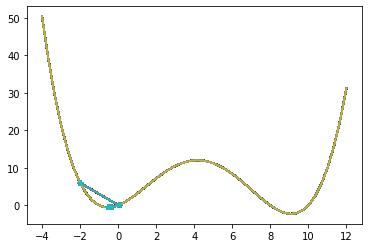

In [ ]:
w = -2
eta = 0.2
n = 1000
plot(w,eta,n)

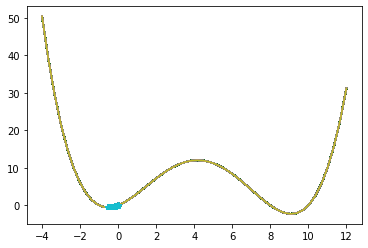

In [ ]:
w = 0
eta = 0.001
n = 1000
plot(w,eta,n)

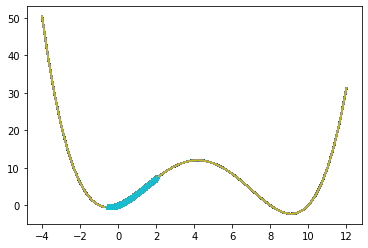

In [ ]:
w = 2
eta = 0.01
n = 1000
plot(w,eta,n)

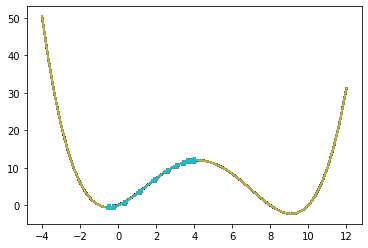

In [ ]:
w = 4
n = 1000
w_t = np.zeros(n)
Ew_t = np.zeros(n)
eta = 0.2
plot(w,eta,n,w_t,Ew_t)

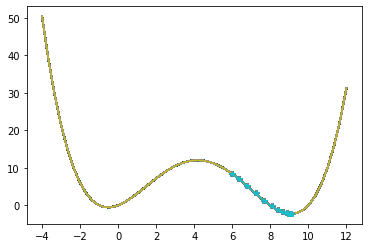

In [ ]:
w = 6
eta = 0.1
n = 1000
plot(w,eta,n)

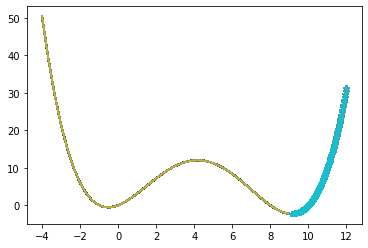

In [ ]:
w = 12
eta = 0.001
n = 1000
plot(w,eta,n)

**Problem 8 (Written: 5 pts):**
Using chain rule, find the gradient for the function $\sigma(E(w))$ where
$\sigma(x) = \frac{1}{1+\exp(-x)}$ and $E(w)$ is defined above (Problem 4):
$$\frac{d\sigma(E(w))}{dw}.$$
Write the answer as a function of $w$. Do not use Wolfram Alpha or similar package (you'll get a mathematically equivalent equation but it will be much more complex). If you do that you will get no credit.

**Hint:** $\frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$.



**Answer:**

$\frac{d \sigma(E(w))}{dw} = σ((E(w)(1-E(w))\frac{dE(w)}{dw} $

= σ((E(w)(1-E(w))*($1/40(4w^3-51w^2+124w+80)$)




# Section IV. Backpropagation 1 (25 pt)

**Problem 9 (Program: 15 pts):**

For this problem, use Keras with TensorFlow to train the data set shown in Problem 3 from scratch. Experiment with different network configurations, and report the results. 

(1) Single layer network;

(2) Two layer networks: Try 2 hidden units, 3 hidden units, and 4 hidden units. In all cases, output unit is 1. 

(3) Analyze the weights and plot the decision boundary (you’ll get a bunch of line equations). Or, alternatively, you can plot the activation value of each hidden or output unit (if you had 3 hidden and 1 output unit, you will need to show 4 such plots in total). For the input, generate a mesh grid of finer grain than the grid in the  Problem 3 data set (see python example below), and then compute the hidden activity.



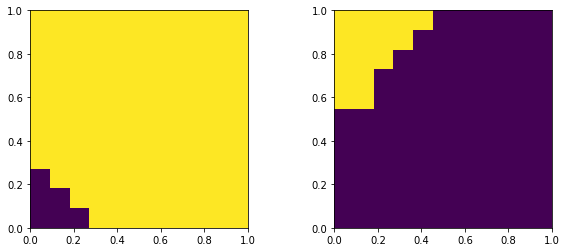

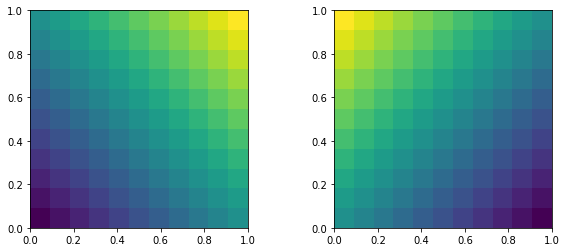

In [ ]:
# This shows how to create the input vectors in a systematic manner, for testing. Suppose a
# well trained neural network has one hidden layer. This hidden layer has two
# neurons: weights [w_1, W2]= [[1, 1], [-1, 1]], biases [b_1, b_2] = [-0.3, -0.5].
# We want to plot decision boundaries for hidden neurons' output >= 0.
import numpy as np
import matplotlib.pyplot as plt

step_size = 0.1
start = 0.
end = 1.

# generate a input meshgrid
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# note: for simplicity, here it is assumed that the hidden layer uses linear activation function.
w11, w12, b1 = 1, 1, -0.3
w21, w22, b2 = -1, 1, -0.5
h1 = w11 * xx + w12 * yy + b1
h2 = w21 * xx + w22 * yy + b2

# plot using imshow : with thresholding
# - be careful with x-y range (extent = ...) and the orientation (origin = ...)
thresh = 0

fig1 = plt.figure(figsize=[10, 4])
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plt.sca(ax1)
plt.imshow(h1 > thresh, extent=[start, end, start, end], origin='lower')

plt.sca(ax2)
plt.imshow(h2 > thresh, extent=[start, end, start, end], origin='lower')

# plot, without thresholding
fig2 = plt.figure(figsize=[10, 4])
ax3 = plt.subplot(1, 2, 1)
ax4 = plt.subplot(1, 2, 2)

plt.sca(ax3)
plt.imshow(h1, extent=[start, end, start, end], origin='lower')

plt.sca(ax4)
plt.imshow(h2, extent=[start, end, start, end], origin='lower')


In [ ]:
# Simple functioning code for the XOR problem.
# - You will have to use the data from problem 3 to modify the code below.
# - You may also have to change some other parts, like learning rate, number of epochs, batch size, etc.
# - experiment with it.
# Simple functioning code for the XOR problem.
# - You will have to use the data from problem 3 to modify the code below.
# - You may also have to change some other parts, like learning rate, number of epochs, batch size, etc.
# - experiment with it.

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# config
#eta = 0.05  # learning rate
#num_epochs = 1000
#b_size = 4  # batch size
def threshold(arr):
  return np.where(arr>0.5,1,0)


def ANN(num_layers,hidden_size,eta=0.05,num_epochs=1000,b_size=4):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data
  x = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
  y = np.array([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4])
  c = np.array([0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0])
  x_train = np.column_stack((x,y))
  y_train = c
  x_test = x_train
  y_test = y_train

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 2
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'sigmoid'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size, input_dim=input_dim,
                    activation=hidden_activation,kernel_initializer = 'GlorotNormal'))
      else:
          model.add(Dense(hidden_size, activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss='mean_squared_error',  # loss defines the error function E()
                optimizer=opt,
                metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result = final_output

  step_size = 0.1
  start = 0.
  end = 5.
  num_layers = num_layers

  # generate a input meshgrid
  x = np.arange(start, end + step_size, step_size)
  y = np.arange(start, end + step_size, step_size)
  xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

  # construct n x 2 array as input.
  mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

  # note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
  for layer_idx in range(num_layers):
      print(f'Layer {layer_idx + 1} plots:')
      # Retrieve hidden layer activity
      final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
      final_output = final.predict(mesh_input)
      num_hidden_units = final_output.shape[1]
      for hidden_unit_idx in range(num_hidden_units):
          # Plots etrieves all i-th hidden unit activation values
          plt.matshow(final_output[0:, hidden_unit_idx].reshape(51, 51),
                      extent=[start, end, start, end], origin='lower')
          plt.show()
  print(threshold(result))
  print(result)
  print(f"the accuracy of the model is {np.sum(threshold(result).reshape(25,)==c)*4}%")
  print("The shape of the output ",result.shape)
  print("The score of the model" ,score)

  # Make sure the final output is something like:
  # [[0.00584927]
  #  [0.9912248 ]
  #  [0.991363  ]
  #  [0.00513098]]
  # which is close to [0, 1, 1, 0], the correct y_test value.


  # Note: depending on the initial weights, this may not converge to the correct solution.
  # - in that case, run it again.


Epoch 1/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.2051 - mean_absolute_error: 0.2922
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1924 - mean_absolute_error: 0.2910
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1868 - mean_absolute_error: 0.2948
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1810 - mean_absolute_error: 0.3209
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1756 - mean_absolute_error: 0.3667
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1730 - mean_absolute_error: 0.3746
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1710 - mean_absolute_error: 0.3683
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1652 - mean_absolute_error: 0.3358
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1686 - mean_absolute_error: 0.3129
Epoch 10/1000
7/7 [

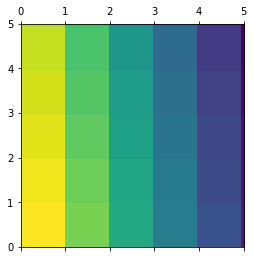

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.1849688 ]
 [0.18383747]
 [0.18271151]
 [0.18159091]
 [0.18047574]
 [0.17467356]
 [0.1735918 ]
 [0.17251533]
 [0.1714442 ]
 [0.1703783 ]
 [0.16483545]
 [0.16380256]
 [0.16277483]
 [0.16175234]
 [0.16073501]
 [0.1554471 ]
 [0.15446213]
 [0.15348226]
 [0.15250751]
 [0.1515378 ]
 [0.1464997 ]
 [0.14556167]
 [0.14462855]
 [0.14370051]
 [0.14277738]]
the accuracy of the model is 80%
The shape of the output  (25, 1)
The score of the model [0.16168060898780823, 0.29808151721954346]


In [ ]:
# FOR A SINGLE LAYERED NETWORK NUMBER OF LAYERS IS 1 AND HIDDEN SIZE = 0
ANN(num_layers=1,hidden_size=0) #at default parameters


Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.3192 - mean_absolute_error: 0.5476
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2000 - mean_absolute_error: 0.4225
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1681 - mean_absolute_error: 0.3538
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1657 - mean_absolute_error: 0.3338
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1626 - mean_absolute_error: 0.3309
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1666 - mean_absolute_error: 0.3530
Epoch 7/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1664 - mean_absolute_error: 0.3557
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1621 - mean_absolute_error: 0.3433
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1627 - mean_absolute_error: 0.3319
Epoch 10/1000
7/7 [

7/7 [==============================] - 0s 3ms/step - loss: 0.1456 - mean_absolute_error: 0.2789
Layer 1 plots:


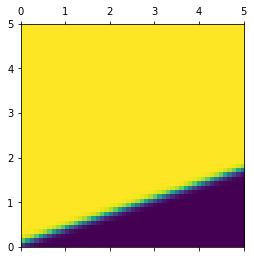

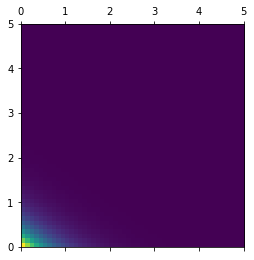

Layer 2 plots:


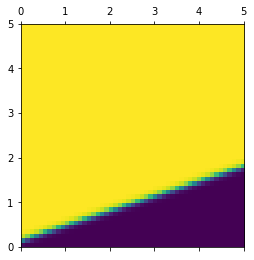

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.01450714]
 [0.23846585]
 [0.23845044]
 [0.23844904]
 [0.23844892]
 [0.00673676]
 [0.23845178]
 [0.23844922]
 [0.23844892]
 [0.23844892]
 [0.00673354]
 [0.23762286]
 [0.23844895]
 [0.23844892]
 [0.23844892]
 [0.0067333 ]
 [0.0154984 ]
 [0.23844892]
 [0.23844892]
 [0.23844892]
 [0.00673324]
 [0.00673574]
 [0.23844868]
 [0.23844892]
 [0.23844892]]
the accuracy of the model is 80%
The shape of the output  (25, 1)
The score of the model [0.1456359326839447, 0.2788846492767334]


In [ ]:
ANN(2,2)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1858 - mean_absolute_error: 0.4016
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1669 - mean_absolute_error: 0.2983
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1607 - mean_absolute_error: 0.2801
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1539 - mean_absolute_error: 0.2928
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1576 - mean_absolute_error: 0.3312
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1595 - mean_absolute_error: 0.3539
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1559 - mean_absolute_error: 0.3274
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1521 - mean_absolute_error: 0.2979
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1514 - mean_absolute_error: 0.3009
Epoch 10/1000
7/7 [

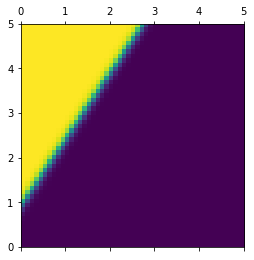

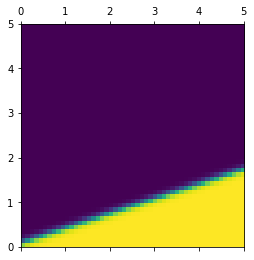

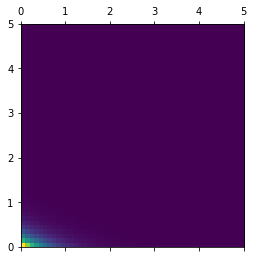

Layer 2 plots:


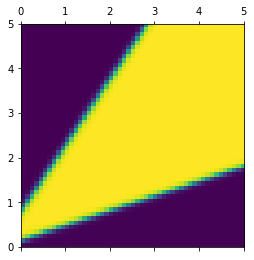

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.01593477]
 [0.03419521]
 [0.00495479]
 [0.00495467]
 [0.00495467]
 [0.00703874]
 [0.4172458 ]
 [0.41108137]
 [0.0049952 ]
 [0.00495467]
 [0.00703442]
 [0.4156756 ]
 [0.4172458 ]
 [0.41722494]
 [0.02498314]
 [0.00703418]
 [0.01774538]
 [0.4172458 ]
 [0.4172458 ]
 [0.4172458 ]
 [0.00703418]
 [0.00703704]
 [0.41724536]
 [0.4172458 ]
 [0.4172458 ]]
the accuracy of the model is 80%
The shape of the output  (25, 1)
The score of the model [0.11017554253339767, 0.22311405837535858]


In [ ]:
ANN(2,3)

Epoch 1/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.2761 - mean_absolute_error: 0.5088
Epoch 2/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.2422 - mean_absolute_error: 0.4770
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.2141 - mean_absolute_error: 0.4442
Epoch 4/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.2004 - mean_absolute_error: 0.4237
Epoch 5/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1899 - mean_absolute_error: 0.4037
Epoch 6/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1856 - mean_absolute_error: 0.3878
Epoch 7/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1781 - mean_absolute_error: 0.3735
Epoch 8/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.1740 - mean_absolute_error: 0.3656
Epoch 9/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1727 - mean_absolute_error: 0.3596
Epoch 10/2000
7/7 [

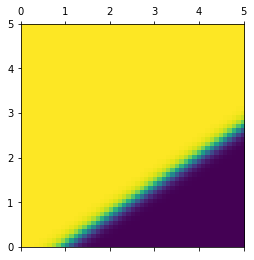

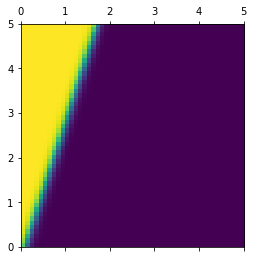

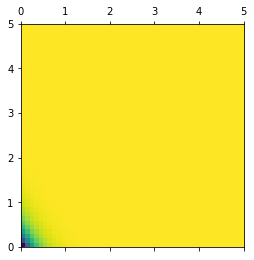

Layer 2 plots:


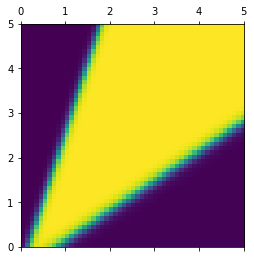

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.03782758]
 [0.01412615]
 [0.0140627 ]
 [0.01406243]
 [0.01406243]
 [0.09039778]
 [0.439756  ]
 [0.433736  ]
 [0.05511928]
 [0.01416349]
 [0.01626927]
 [0.4127261 ]
 [0.43979442]
 [0.43979496]
 [0.43978214]
 [0.01623389]
 [0.01764092]
 [0.43907565]
 [0.43979496]
 [0.43979496]
 [0.01623383]
 [0.01623476]
 [0.09079078]
 [0.4397765 ]
 [0.43979496]]
the accuracy of the model is 80%
The shape of the output  (25, 1)
The score of the model [0.1116616502404213, 0.2360319197177887]


In [ ]:
ANN(2,3,eta=0.01,num_epochs=2000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2143 - mean_absolute_error: 0.4482
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1723 - mean_absolute_error: 0.3566
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1697 - mean_absolute_error: 0.3120
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1639 - mean_absolute_error: 0.2917
Epoch 5/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1590 - mean_absolute_error: 0.2970
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1566 - mean_absolute_error: 0.3175
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1548 - mean_absolute_error: 0.3200
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1544 - mean_absolute_error: 0.3228
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1538 - mean_absolute_error: 0.3322
Epoch 10/1000
7/7 [

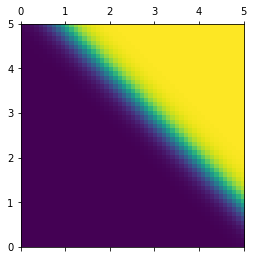

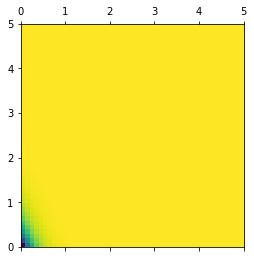

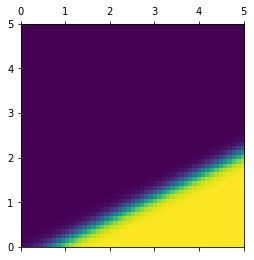

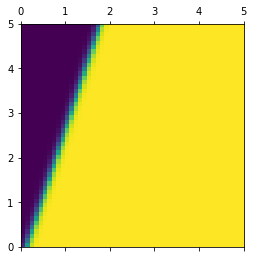

Layer 2 plots:


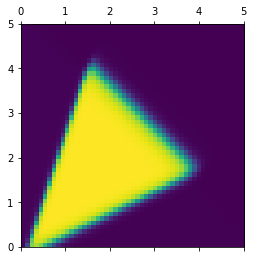

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.01647222]
 [0.00889501]
 [0.00888729]
 [0.00888705]
 [0.0088774 ]
 [0.0212999 ]
 [0.8698201 ]
 [0.86640817]
 [0.02290729]
 [0.00785068]
 [0.00415462]
 [0.85207707]
 [0.8698232 ]
 [0.8554121 ]
 [0.03726661]
 [0.00409424]
 [0.02547872]
 [0.85568506]
 [0.03898102]
 [0.00265026]
 [0.00408989]
 [0.0037072 ]
 [0.03597188]
 [0.00265267]
 [0.00255919]]
the accuracy of the model is 96%
The shape of the output  (25, 1)
The score of the model [0.03446229547262192, 0.07344389706850052]


In [ ]:
ANN(2,4)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.3452 - mean_absolute_error: 0.5602
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.2523 - mean_absolute_error: 0.4855
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1989 - mean_absolute_error: 0.4263
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1756 - mean_absolute_error: 0.3838
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1647 - mean_absolute_error: 0.3535
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 0.1655 - mean_absolute_error: 0.3369
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1618 - mean_absolute_error: 0.3209
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1607 - mean_absolute_error: 0.3155
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1603 - mean_absolute_error: 0.3129
Epoch 10/1000
7/7 [

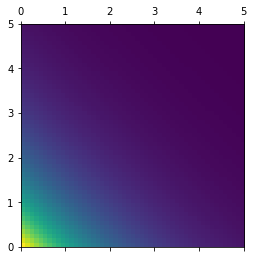

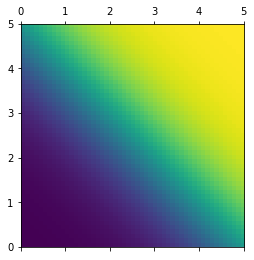

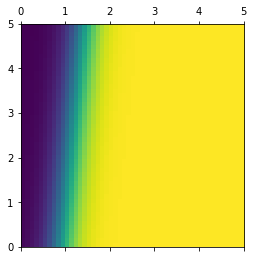

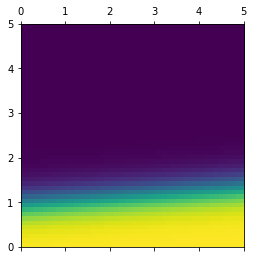

Layer 2 plots:


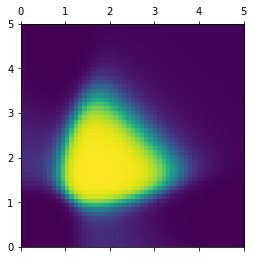

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[1.76322701e-05]
 [3.92752886e-03]
 [1.38003290e-01]
 [5.98720610e-02]
 [6.89834356e-03]
 [8.29482079e-03]
 [2.00464398e-01]
 [8.18529725e-01]
 [1.54684931e-01]
 [2.02271342e-03]
 [1.29613787e-01]
 [7.59701848e-01]
 [9.91168022e-01]
 [7.67436147e-01]
 [9.60335433e-02]
 [5.55676222e-02]
 [1.41976297e-01]
 [7.72901416e-01]
 [1.30859137e-01]
 [2.43898332e-02]
 [6.18997216e-03]
 [2.20248103e-03]
 [1.03390515e-01]
 [2.43121386e-02]
 [1.21887326e-02]]
the accuracy of the model is 100%
The shape of the output  (25, 1)
The score of the model [0.01446999330073595, 0.08764689415693283]


In [ ]:
ANN(2,4,0.01,1000)

Epoch 1/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1953 - mean_absolute_error: 0.3186
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1741 - mean_absolute_error: 0.2859
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1678 - mean_absolute_error: 0.3547
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1781 - mean_absolute_error: 0.4060
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1487 - mean_absolute_error: 0.3200
Epoch 6/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1529 - mean_absolute_error: 0.2832
Epoch 7/1000
7/7 [==============================] - 0s 1ms/step - loss: 0.1535 - mean_absolute_error: 0.2768
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1491 - mean_absolute_error: 0.2848
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 0.1427 - mean_absolute_error: 0.3056
Epoch 10/1000
7/7 [

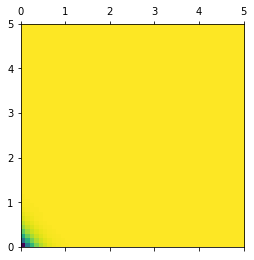

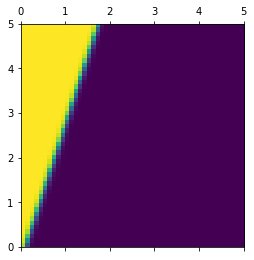

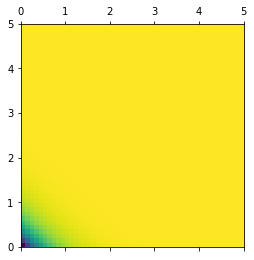

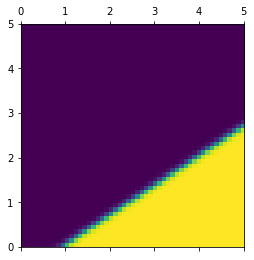

Layer 2 plots:


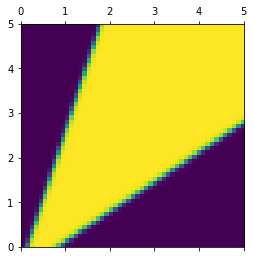

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.00833854]
 [0.00417513]
 [0.00417456]
 [0.00417453]
 [0.00417456]
 [0.01754144]
 [0.40061787]
 [0.40031385]
 [0.01161772]
 [0.00417483]
 [0.00306621]
 [0.39906985]
 [0.4006157 ]
 [0.4006157 ]
 [0.4006157 ]
 [0.00306618]
 [0.00307101]
 [0.40061483]
 [0.4006157 ]
 [0.4006157 ]
 [0.00306618]
 [0.00306618]
 [0.01829123]
 [0.4006157 ]
 [0.4006157 ]]
the accuracy of the model is 80%
The shape of the output  (25, 1)
The score of the model [0.11049865931272507, 0.21977858245372772]


In [ ]:
ANN(2,4,0.1,1000)

Epoch 1/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.2276 - mean_absolute_error: 0.4531
Epoch 2/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1777 - mean_absolute_error: 0.2953
Epoch 3/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1727 - mean_absolute_error: 0.2724
Epoch 4/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.1692 - mean_absolute_error: 0.2923
Epoch 5/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1640 - mean_absolute_error: 0.3005
Epoch 6/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1639 - mean_absolute_error: 0.3028
Epoch 7/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.1651 - mean_absolute_error: 0.3040
Epoch 8/2000
7/7 [==============================] - 0s 1ms/step - loss: 0.1632 - mean_absolute_error: 0.3155
Epoch 9/2000
7/7 [==============================] - 0s 2ms/step - loss: 0.1640 - mean_absolute_error: 0.3237
Epoch 10/2000
7/7 [

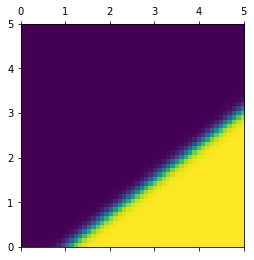

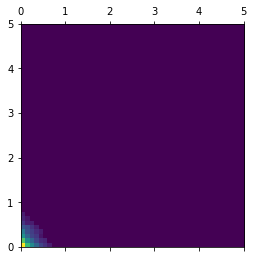

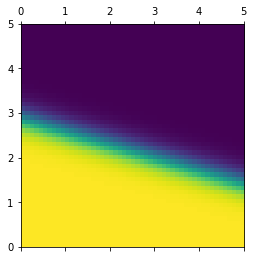

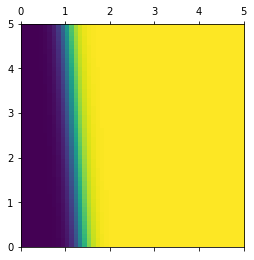

Layer 2 plots:


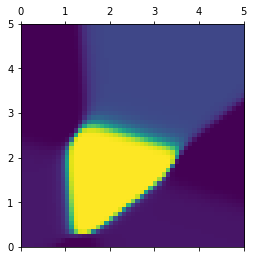

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[6.33291304e-02]
 [6.33974671e-02]
 [5.74986935e-02]
 [1.19081058e-07]
 [3.21294935e-10]
 [1.37984753e-04]
 [3.37475032e-01]
 [5.32220244e-01]
 [2.97270731e-07]
 [1.09941152e-06]
 [5.52177727e-02]
 [1.00000000e+00]
 [9.99999702e-01]
 [2.57763565e-01]
 [2.12071270e-01]
 [5.88120520e-02]
 [5.92151880e-02]
 [9.99711871e-01]
 [2.20904827e-01]
 [2.13065773e-01]
 [5.87822795e-02]
 [4.55737710e-02]
 [1.01532525e-08]
 [2.13680267e-01]
 [2.13050097e-01]]
the accuracy of the model is 96%
The shape of the output  (25, 1)
The score of the model [0.04562898725271225, 0.1233007162809372]


In [ ]:
ANN(2,4,0.05,2000)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.2203 - mean_absolute_error: 0.3805
Epoch 2/1000
25/25 [==============================] - 0s 898us/step - loss: 0.1798 - mean_absolute_error: 0.2611
Epoch 3/1000
25/25 [==============================] - 0s 944us/step - loss: 0.1798 - mean_absolute_error: 0.3367
Epoch 4/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1624 - mean_absolute_error: 0.2943
Epoch 5/1000
25/25 [==============================] - 0s 991us/step - loss: 0.1616 - mean_absolute_error: 0.3288
Epoch 6/1000
25/25 [==============================] - 0s 967us/step - loss: 0.1616 - mean_absolute_error: 0.3469
Epoch 7/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1704 - mean_absolute_error: 0.2782
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.1601 - mean_absolute_error: 0.3254
Epoch 9/1000
25/25 [==============================] - 0s 915us/step - loss: 0.1735 - mean_absolute_error

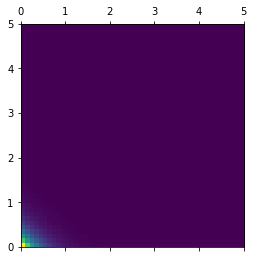

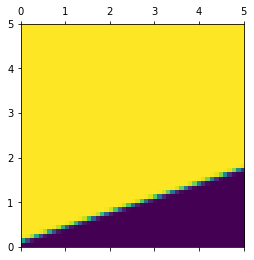

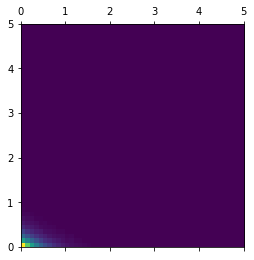

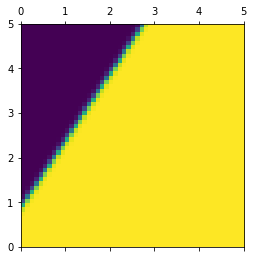

Layer 2 plots:


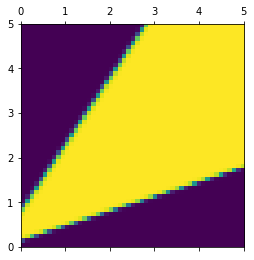

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]
[[0.00733644]
 [0.01793969]
 [0.00574064]
 [0.00574064]
 [0.00574064]
 [0.00696495]
 [0.54480374]
 [0.5442597 ]
 [0.00574148]
 [0.00574064]
 [0.00696501]
 [0.54479766]
 [0.54480374]
 [0.54480374]
 [0.01665026]
 [0.00696501]
 [0.00777316]
 [0.54480374]
 [0.54480374]
 [0.54480374]
 [0.00696501]
 [0.00696501]
 [0.54480374]
 [0.54480374]
 [0.54480374]]
the accuracy of the model is 76%
The shape of the output  (25, 1)
The score of the model [0.11274027079343796, 0.2263432890176773]


In [ ]:
#now lets try SGD
ANN(2,4,b_size=1)

Epoch 1/1000
1/1 [==============================] - 0s 240ms/step - loss: 0.3824 - mean_absolute_error: 0.5898
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.3334 - mean_absolute_error: 0.5577
Epoch 3/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2901 - mean_absolute_error: 0.5259
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2543 - mean_absolute_error: 0.4954
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2261 - mean_absolute_error: 0.4666
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.2054 - mean_absolute_error: 0.4406
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1914 - mean_absolute_error: 0.4181
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1822 - mean_absolute_error: 0.3990
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1760 - mean_absolute_error: 0.3825
Epoch 10/1000


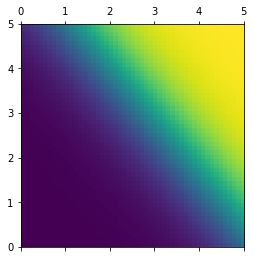

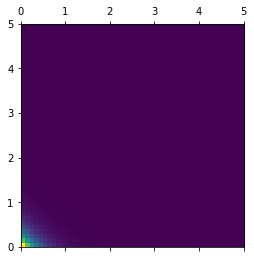

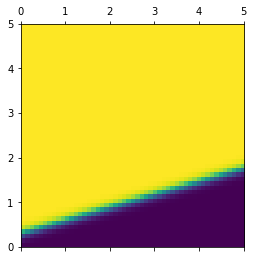

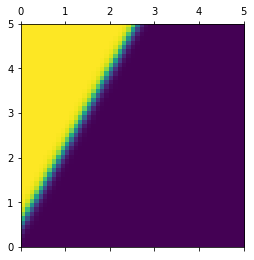

Layer 2 plots:


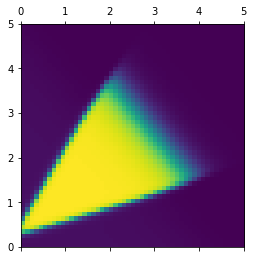

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[0.037218  ]
 [0.04135951]
 [0.03663337]
 [0.03401452]
 [0.02584991]
 [0.0360685 ]
 [0.98124015]
 [0.96658015]
 [0.02342871]
 [0.0073064 ]
 [0.03478557]
 [0.9658419 ]
 [0.96644294]
 [0.87305796]
 [0.01085097]
 [0.0292564 ]
 [0.02721015]
 [0.8122724 ]
 [0.15037093]
 [0.01026189]
 [0.01335612]
 [0.0017707 ]
 [0.08409479]
 [0.00718382]
 [0.00254998]]
the accuracy of the model is 96%
The shape of the output  (25, 1)
The score of the model [0.04234866052865982, 0.08042460680007935]


In [ ]:
ANN(2,4,b_size=25)

**Answer:**

(1) for single layer more or less its predicting a threshold. Since the dataset is imbalanced its predicting all lower values.

(2) for 2,2 its a line. 2,3 its 3 lines but 2 are visible and 2,4 with 2000 itertions is a 4 lines but 3 can be visible forming triangle.

(3) for 2,2 its a line. 2,3 its 3 lines but 2 are visible and 2,4 with 2000 itertions is a 4 lines but 3 can be visible forming triangle. the best accuracy is 100, so we understand with 4 neurons this xor can be classified.

Epoch 1/1000
1/1 [==============================] - 0s 274ms/step - loss: 0.9414 - accuracy: 0.4400
Epoch 2/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.7547 - accuracy: 0.5600
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.6566 - accuracy: 0.5600
Epoch 4/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.6078 - accuracy: 0.6400
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.8000
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.8000
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5407 - accuracy: 0.8000
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5282 - accuracy: 0.8000
Epoch 9/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5189 - accuracy: 0.8000
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.5121 - accuracy: 0.8000
Epoch 11/1000
1/1

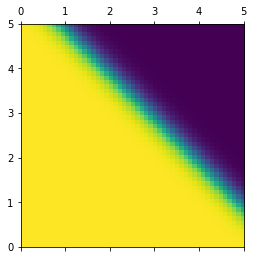

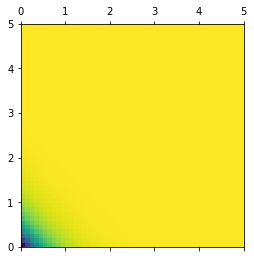

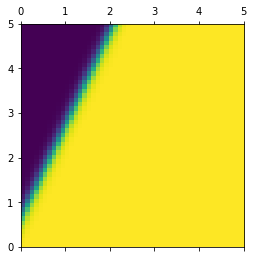

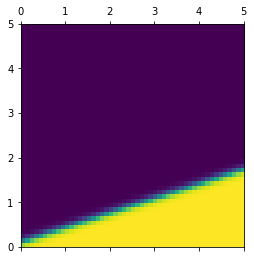

Layer 2 plots:


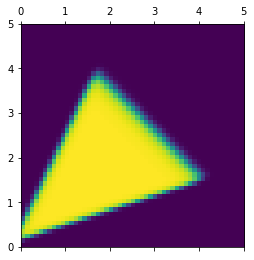

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[1.3317168e-03]
 [1.1613071e-03]
 [3.0338764e-04]
 [3.0264258e-04]
 [3.0246377e-04]
 [2.9045343e-04]
 [8.3647037e-01]
 [8.3081359e-01]
 [2.6860833e-03]
 [2.7912855e-04]
 [2.8863549e-04]
 [8.3147609e-01]
 [8.3634853e-01]
 [8.2448035e-01]
 [3.2259524e-03]
 [2.8851628e-04]
 [2.5067329e-03]
 [8.2441413e-01]
 [3.2500327e-03]
 [6.3207575e-05]
 [2.8836727e-04]
 [2.6559830e-04]
 [3.2023787e-03]
 [6.3198655e-05]
 [6.1660285e-05]]
the accuracy of the model is 96%
The shape of the output  (25, 1)
The score of the model [0.1106257513165474, 0.9599999785423279]


In [ ]:
#now lets try BCE loss since this is a classification problem.

# Simple functioning code for the XOR problem.
# - You will have to use the data from problem 3 to modify the code below.
# - You may also have to change some other parts, like learning rate, number of epochs, batch size, etc.
# - experiment with it.
# Simple functioning code for the XOR problem.
# - You will have to use the data from problem 3 to modify the code below.
# - You may also have to change some other parts, like learning rate, number of epochs, batch size, etc.
# - experiment with it.

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# config
#eta = 0.05  # learning rate
#num_epochs = 1000
#b_size = 4  # batch size
def threshold(arr):
  return np.where(arr>0.5,1,0)


def ANN(num_layers,hidden_size,eta=0.05,num_epochs=1000,b_size=4):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data
  x = np.array([0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4])
  y = np.array([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4])
  c = np.array([0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0])
  x_train = np.column_stack((x,y))
  y_train = c
  x_test = x_train
  y_test = y_train

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 2
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'sigmoid'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size, input_dim=input_dim,
                    activation=hidden_activation))
      else:
          model.add(Dense(hidden_size, activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss='BinaryCrossentropy',  # loss defines the error function E()
                optimizer=opt,
                metrics=['accuracy'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result = final_output

  step_size = 0.1
  start = 0.
  end = 5.
  num_layers = num_layers

  # generate a input meshgrid
  x = np.arange(start, end + step_size, step_size)
  y = np.arange(start, end + step_size, step_size)
  xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

  # construct n x 2 array as input.
  mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

  # note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
  for layer_idx in range(num_layers):
      print(f'Layer {layer_idx + 1} plots:')
      # Retrieve hidden layer activity
      final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
      final_output = final.predict(mesh_input)
      num_hidden_units = final_output.shape[1]
      for hidden_unit_idx in range(num_hidden_units):
          # Plots etrieves all i-th hidden unit activation values
          plt.matshow(final_output[0:, hidden_unit_idx].reshape(51, 51),
                      extent=[start, end, start, end], origin='lower')
          plt.show()
  print(threshold(result))
  print(result)
  print(f"the accuracy of the model is {np.sum(threshold(result).reshape(25,)==c)*4}%")
  print("The shape of the output ",result.shape)
  print("The score of the model" ,score)

  # Make sure the final output is something like:
  # [[0.00584927]
  #  [0.9912248 ]
  #  [0.991363  ]
  #  [0.00513098]]
  # which is close to [0, 1, 1, 0], the correct y_test value.


  # Note: depending on the initial weights, this may not converge to the correct solution.
  # - in that case, run it again.

ANN(2,4,0.07,1000,25)


**Problem 10 (Program: 10 pts):** Again, use Keras with TensorFlow. Implement sine function approximation from scratch. The training and test data are generated as below.

(1) Experiment with different network configurations: Two layers (5 hidden units, 10 hidden units, 30 hidden units), Three layers (1st hidden layer: 5 hidden units, 2nd hidden layer: 3 hidden units  ; and   1st hidden layer: 20 units, 2nd: 3 units).

(2) Plot each unit's activities in the last hidden layers (right before the output layer) in each of your models. Explain how the different number of hidden layers and number of hidden units affect the accuracy of the model, and how the hidden representations contribute to the final outcome.

(3) Run your models by slightly extending the original test set (for example, input from $[-6\pi, 6\pi]$, so that the x-range goes beyond that of the training set). Explain why the out-of-range portions behave in the way that you observe. 

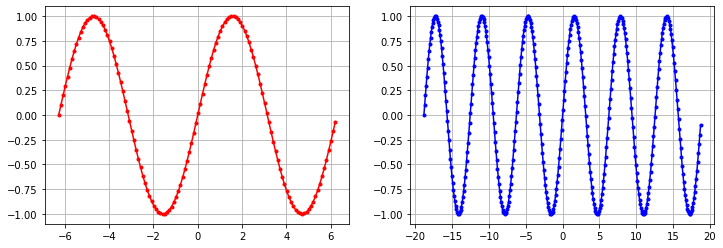

In [ ]:
# Important Note:
#
# In this case, "x" is the input and "y" is the target value!
#
# Do not confuse this with the classification case, where you had "(x,y)"" as input

# and "c" as target value.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model



x_train = np.arange(-2 * np.pi, 2 * np.pi, 0.1)
y_train = np.sin(x_train)
x_test = x_train
y_test = y_train
x_extend = np.arange(-6 * np.pi, 6 * np.pi, 0.1)
y_extend = np.sin(x_extend)

plt.figure(figsize=[12, 4])
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

plt.sca(ax1)
plt.plot(x_train, y_train, marker='.', color='r', linestyle='-')
plt.grid()

plt.sca(ax2)
plt.plot(x_extend, y_extend, marker='.', color='b', linestyle='-')
plt.grid()


In [ ]:
# You can modify the XOR example code above to train and test on the sin(x) data. 
# - Note that you may have to use a different metric, since this is a regression (accuracy is for classification).
# - Use MeanAbsoluteError as shown below. 

# model.compile(loss='mean_squared_error',
#               optimizer=tf.keras.optimizers.Adam(0.001),
#               metrics=[tf.keras.metrics.MeanAbsoluteError()])
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model



def ANN(num_layers,hidden_size,eta=0.001,num_epochs=1000,b_size=8,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test,x_extend=x_extend):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 1
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'linear'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size, input_dim=input_dim,
                    activation=hidden_activation))
      else:
          model.add(Dense(hidden_size, activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss='mean_squared_error',  # loss defines the error function E()
                optimizer=opt,
                metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result1 = final_output
  result2 = final.predict(x_extend)

  plt.figure(figsize=[12, 4])
  ax1 = plt.subplot(1, 2, 1)
  ax2 = plt.subplot(1,2,2)

  plt.sca(ax1)
  plt.plot(x_extend, result2, marker='.', color='r', linestyle='-')
  plt.grid()

  plt.sca(ax2)
  plt.plot(x_test, y_test, marker='.', color='b', linestyle='-')
  plt.grid()

  return model,num_layers

  




Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9555 - mean_absolute_error: 0.7846
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8186 - mean_absolute_error: 0.7378
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7079 - mean_absolute_error: 0.6990
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.6163 - mean_absolute_error: 0.6632
Epoch 5/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.5468 - mean_absolute_error: 0.6353
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4920 - mean_absolute_error: 0.6097
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.4495 - mean_absolute_error: 0.5875
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4158 - mean_absolute_error: 0.5685
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3925 - mean_absolute_error: 0.5534
E

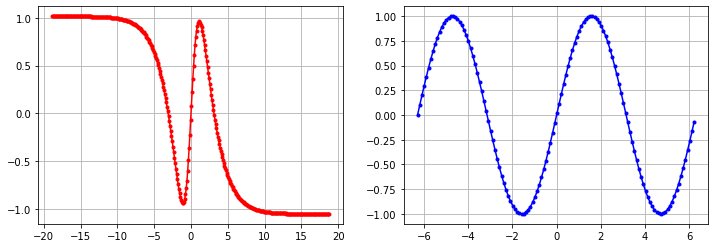

In [ ]:
model,layers = ANN(2,5)

In [ ]:
def plots(model,num_layers):
  step_size = 0.1
  start = -20
  end = 20
  num_layers = num_layers
  # generate a input meshgrid
  x = np.arange(start, end + step_size, step_size)

  final = Model(inputs=model.input, outputs=model.layers[-2].output)
  final_output = final.predict(x)
  num_hidden_units = final_output.shape[1]
  for hidden_unit_idx in range(num_hidden_units):
    plt.plot(x,final_output[:,hidden_unit_idx])


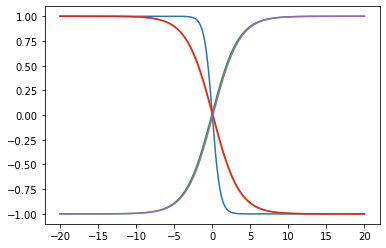

In [ ]:
plots(model,2)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4237 - mean_absolute_error: 0.5827
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3888 - mean_absolute_error: 0.5516
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.3659 - mean_absolute_error: 0.5331
Epoch 4/1000
16/16 [==============================] - 0s 1ms/step - loss: 0.3462 - mean_absolute_error: 0.5183
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3268 - mean_absolute_error: 0.5033
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3119 - mean_absolute_error: 0.4936
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2941 - mean_absolute_error: 0.4796
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2797 - mean_absolute_error: 0.4673
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2667 - mean_absolute_error: 0.4572
E

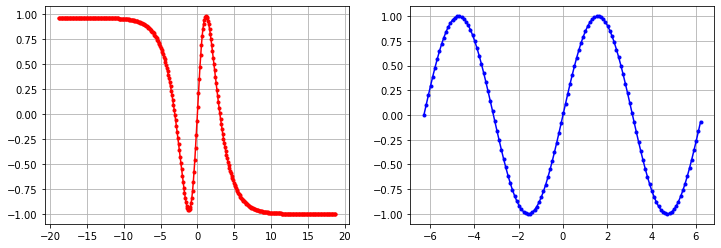

In [ ]:
model,num_layers = ANN(2,10,num_epochs=1000)


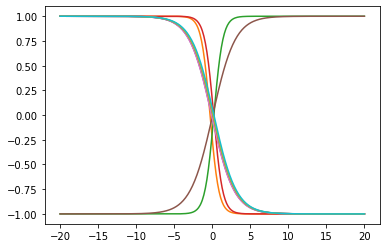

In [ ]:
plots(model,2)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4459 - mean_absolute_error: 0.5893
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4037 - mean_absolute_error: 0.5567
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3828 - mean_absolute_error: 0.5382
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3594 - mean_absolute_error: 0.5270
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3386 - mean_absolute_error: 0.5134
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3220 - mean_absolute_error: 0.5022
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3055 - mean_absolute_error: 0.4903
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2891 - mean_absolute_error: 0.4778
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2791 - mean_absolute_error: 0.4693
E

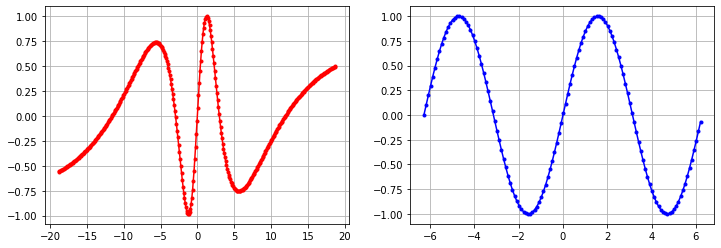

In [ ]:
model,num_layers=ANN(2,30)

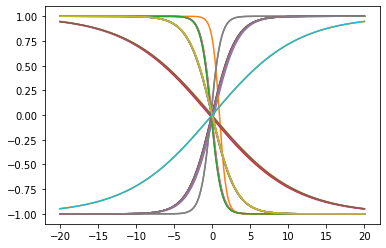

In [ ]:
plots(model,2)

In [ ]:
# You can modify the XOR example code above to train and test on the sin(x) data. 
# - Note that you may have to use a different metric, since this is a regression (accuracy is for classification).
# - Use MeanAbsoluteError as shown below. 

# model.compile(loss='mean_squared_error',
#               optimizer=tf.keras.optimizers.Adam(0.001),
#               metrics=[tf.keras.metrics.MeanAbsoluteError()])
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model



def ANN(num_layers,hidden_size,eta=0.001,num_epochs=1000,b_size=8,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test,x_extend=x_extend):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 1
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'linear'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size[i], input_dim=input_dim,
                    activation=hidden_activation))
      else:
          model.add(Dense(hidden_size[i], activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss='mean_squared_error',  # loss defines the error function E()
                optimizer=opt,
                metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result1 = final_output
  result2 = final.predict(x_extend)

  plt.figure(figsize=[12, 4])
  ax1 = plt.subplot(1, 2, 1)
  ax2 = plt.subplot(1,2,2)

  plt.sca(ax1)
  plt.plot(x_extend, result2, marker='.', color='r', linestyle='-')
  plt.grid()

  plt.sca(ax2)
  plt.plot(x_test, y_test, marker='.', color='b', linestyle='-')
  plt.grid()

  return model,num_layers


Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5163 - mean_absolute_error: 0.6469
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4979 - mean_absolute_error: 0.6342
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4844 - mean_absolute_error: 0.6234
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4737 - mean_absolute_error: 0.6150
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4671 - mean_absolute_error: 0.6090
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4581 - mean_absolute_error: 0.6016
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4511 - mean_absolute_error: 0.5965
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4453 - mean_absolute_error: 0.5924
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4384 - mean_absolute_error: 0.5873
E

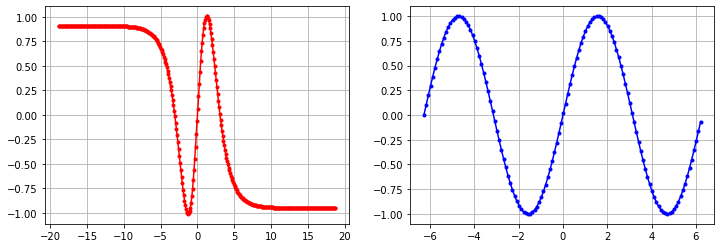

In [ ]:
model,num_layers = ANN(3,[5,3])

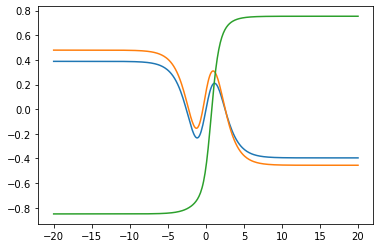

In [ ]:
plots(model,3)

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 1.9420 - mean_absolute_error: 1.2718
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9632 - mean_absolute_error: 0.7932
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.5516 - mean_absolute_error: 0.6202
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4892 - mean_absolute_error: 0.6193
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4691 - mean_absolute_error: 0.6064
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4437 - mean_absolute_error: 0.5839
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4283 - mean_absolute_error: 0.5703
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.4049 - mean_absolute_error: 0.5583
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.3881 - mean_absolute_error: 0.5496
E

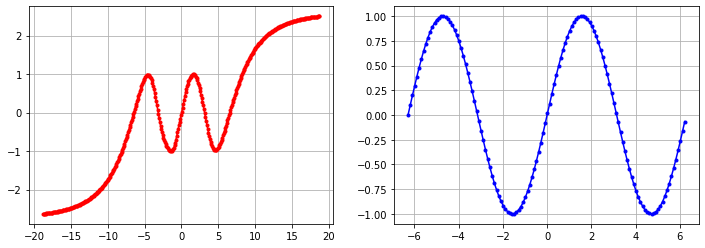

In [ ]:
model,num_layers=ANN(3,[20,3])

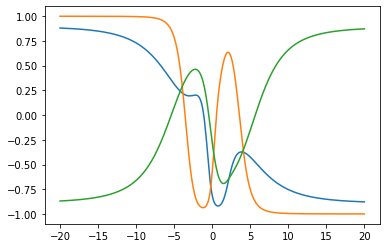

In [ ]:
plots(model,3)

**Answer:**

(1) We experimented with all the conditions as mentioned and it turns out the 3 layered model with [20,3] works best.

(2) Different no of hidden units increase the non linearity as well as complexity of the model. Hence when we slowly increase the hidden units from 5 to 20, we see the loss function going down. Also the last layers activity shows how different units are contributing to the entire model, So some are going up and some are going down and we take a linear layer at the last it just kind of averages out the affect to do best on the training set. With increase in the no of layers,now the non linearity is kind of multiplying on each other and hence we get better results as we are trying to model sin with tanh,more non linearity better results.

(3) we pass it on x extend but it cant model those regions as training set does not include that part, so it believes that to be constant or a linear extrapolation. Since training and testing data have different ranges but the model is basically a mapping, it cannot understand unseen data.




# Section V. Backpropagation 2 (20 pt)



**Problem 11 (Program: 20 pt)** 

Build a multilayer neural network to learn the spiral data set below. Use as many layers as needed. 

(1) Write the code, using the code above (example code for XOR).

(2) Design an appropriate network architecture (number of layers, number of units in each layer, activation function type[link text](https://) [first try tanh]), and train the network to reach high accuracy (> 95%). Note: There will be only one output unit, which outputs +1 for positive, and -1 for negative. 

(3) Plot the decision boundary of all the hidden units and the output unit (write code to do this, for arbitrary number of layers and neurons). Hint: see https://playground.tensorflow.org for example. No need to plot the connections. Just plot 1st hidden layer in the first row, 2nd hidden layer in the second row, etc. See example below:

```
[  ] [  ] [  ] [  ]  : hidden layer 1 boundaries
[  ] [  ] [  ]       : hidden layer 2 boundaries
...
...
[  ] : output layer
```

(4) Explain how adding more layers allows the multilayer network to learn more complex decision boundaries, referring to your answer to (3) above. 

answer: Clearly we can tell with adding more layers we introduce non linearity, so with each layer we can see the decision boundry becomes more non linear, while initial boundry helps to give a linear boundry, after that non linearities add on and the boundries become smoother and more complex.

I have built finally a 4 layered 8 neuron hidden size architecture which does pretty well in capturing the data. Binary Cross Entropy is not applied since target is -1,1 not 0 1.

' \nIMPLEMENT your neural network below\n'

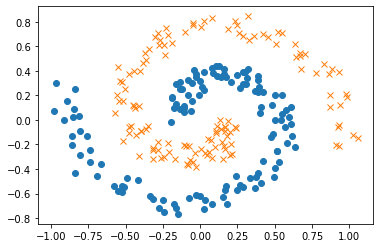

In [1]:
''' Spiral data set'''

import random
import numpy as np
import matplotlib.pyplot as plt

# config
rand_factor = 1.5


def spiral_1(t):
    '''parametric curve of a spiral : clockwise'''
    dat = np.array([(t+1)*np.sin(t+5), (t+1)*np.cos(t+5)])
    noise = np.random.rand(2, len(dat[0, :]))*rand_factor
    return (dat+noise-0.5)/7.5


def spiral_2(t):
    '''parametric curve of a spiral : counter-clockwise'''
    dat = np.array([-(t+1)*np.sin(t+5), -(t+1)*np.cos(t+5)])
    noise = np.random.rand(2, len(dat[0, :]))*rand_factor
    return (dat+noise-0.5)/7.5

# ---------------------
# DATA:
#  pos_dat is positive data (output = +1)
#  neg_dat is negative data (output = +1)
#
#  Note: pos_dat([:, 0]) is the input x values (column vector), and
#        pos_dat([:, 1]) is the input y values (column vector).
#        pos_dat([k, :]) is the single sample (x_k, y_k), and the target
#                       value would be '+1' (since this is the positive set)
# ---------------------


# Set data range
t = np.arange(0, 2*np.pi, 0.05)

pos_dat = np.transpose(spiral_1(t))
neg_dat = np.transpose(spiral_2(t))

# ---------------------
# Plot the data:
#   plotting all rows:
# --------------------- each row is the x,y coordinate
plt.plot(pos_dat[:, 0], pos_dat[:, 1], 'o', neg_dat[:, 0], neg_dat[:, 1], 'x')


''' 
IMPLEMENT your neural network below
'''

# to construct the data set, first you can concatenate pos_dat and neg_dat,
# and then set the target value vector to [1, 1, 1, 1, 1, 1, ...., 1, -1, -1, -1, -1, -1, ...., -1].

In [2]:
X = np.concatenate([pos_dat,neg_dat],axis=0)
target = np.concatenate([np.ones(pos_dat.shape[0]),-1*np.ones(neg_dat.shape[0])])
print(target.shape)
print(X.shape)

(252,)
(252, 2)


In [3]:
x_train = X
y_train = target
x_test = X
y_test = target

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def ANN(num_layers,hidden_size,eta=0.01,num_epochs=300,b_size=8,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 2
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'tanh'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size[i], input_dim=input_dim,
                    activation=hidden_activation))
      else:
          model.add(Dense(hidden_size[i], activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss='mean_squared_error',  # loss defines the error function E()
                optimizer=opt,
                metrics=['mean_absolute_error'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result1 = final_output
  print(final_output)

  return model,num_layers,result1


In [ ]:
model,num_layers,result1 = ANN(4,[8,8,8])

Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 0.9831 - mean_absolute_error: 0.9516
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9387 - mean_absolute_error: 0.9438
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9454 - mean_absolute_error: 0.9325
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9461 - mean_absolute_error: 0.9548
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 0.9443 - mean_absolute_error: 0.9285
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9476 - mean_absolute_error: 0.9465
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9489 - mean_absolute_error: 0.9384
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9406 - mean_absolute_error: 0.9476
Epoch 9/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9289 - mean_absolute_error: 0.9333
Epoch 10/3

The accuracy is 100


In [ ]:
ans = np.where(result1>0,1,-1)
print("The accuracy is",(y_train.reshape(-1,1)==ans).sum()/252*100)

The accuracy is 100.0


In [ ]:
result1.shape

(252, 1)

Layer 1 plots:


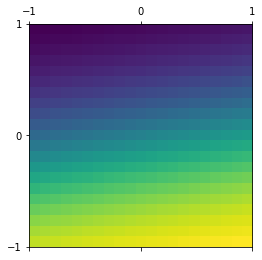

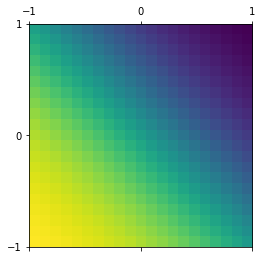

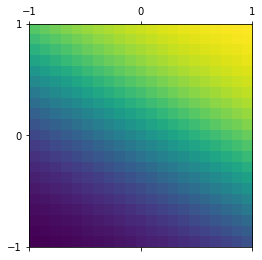

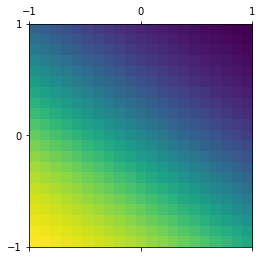

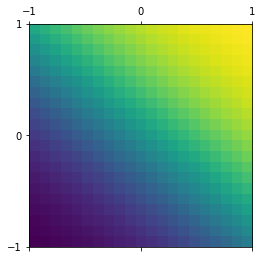

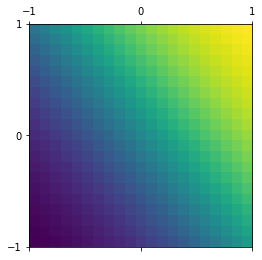

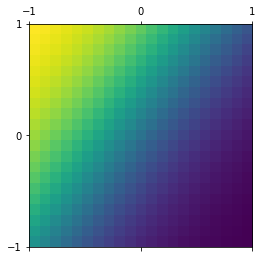

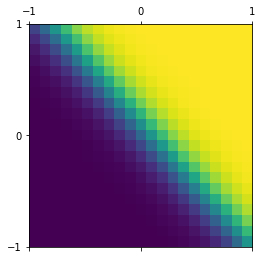

Layer 2 plots:


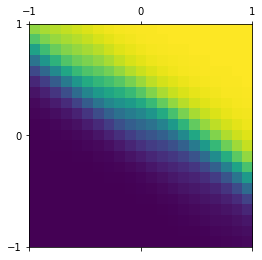

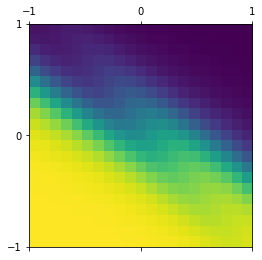

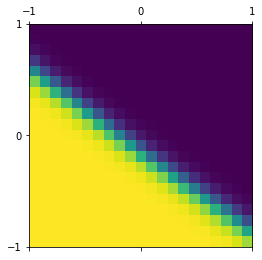

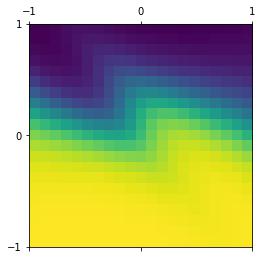

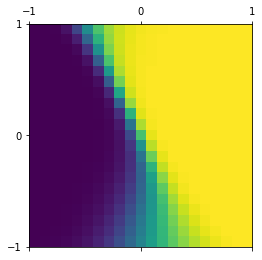

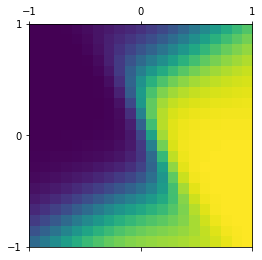

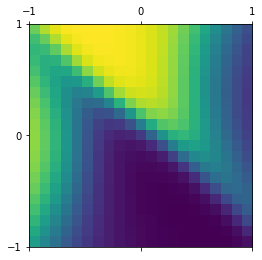

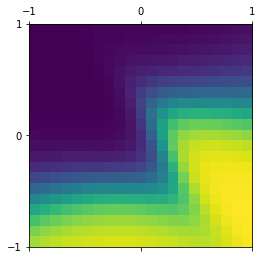

Layer 3 plots:


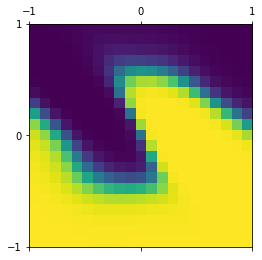

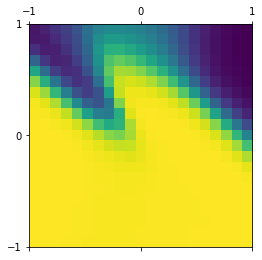

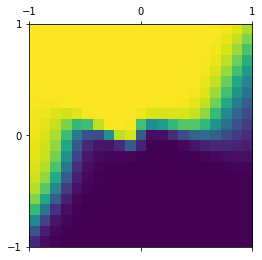

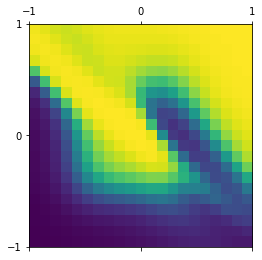

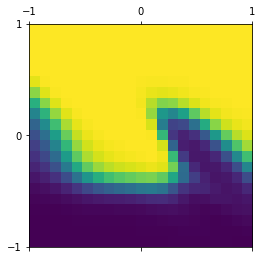

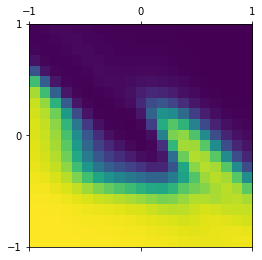

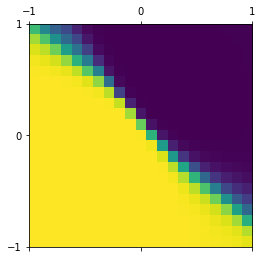

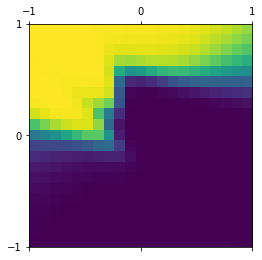

Layer 4 plots:


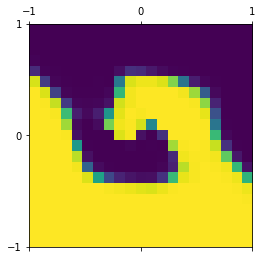

In [ ]:
step_size = 0.1
start = -1
end = 1
num_layers = num_layers
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# construct n x 2 array as input.
mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

# note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
for layer_idx in range(num_layers):
    print(f'Layer {layer_idx + 1} plots:')
    # Retrieve hidden layer activity
    final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    final_output = final.predict(mesh_input)
    num_hidden_units = final_output.shape[1]
    for hidden_unit_idx in range(num_hidden_units):
        # Plots etrieves all i-th hidden unit activation values
        plt.matshow(final_output[0:, hidden_unit_idx].reshape(21,21),
                    extent=[start, end, start, end], origin='lower')
        plt.show()

In [4]:
y_train = np.concatenate([np.ones(126),np.zeros(126)],axis=0)
y_test = y_train

In [10]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def ANN(num_layers,hidden_size,eta=0.01,num_epochs=700,b_size=8,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test):

  # config
  eta = eta  # learning rate
  num_epochs = num_epochs
  b_size = b_size  # batch size

  # data

  # model configuration
  num_layers = num_layers
  hidden_size = hidden_size
  input_dim = 2
  output_dim = 1
  hidden_activation = 'tanh'
  output_activation = 'sigmoid'

  # define model architecture
  model = Sequential()
  for i in range(num_layers - 1):  # add hidden layer(s)
      if i == 0:
          model.add(Dense(hidden_size[i], input_dim=input_dim,
                    activation=hidden_activation))
      else:
          model.add(Dense(hidden_size[i], activation=hidden_activation))
  model.add(Dense(output_dim, activation=output_activation))  # add output layer

  # optimizer
  opt = tf.keras.optimizers.Adam(learning_rate=eta)

  # build model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),  # loss defines the error function E()
                optimizer=opt,
                metrics=['accuracy'])  # metrics is the performance metric: may use 'accuracy' but the results will be against your intuition

  # train & evaluate
  model.fit(x_train, y_train, epochs=num_epochs, batch_size=b_size)
  score = model.evaluate(x_test, y_test, batch_size=b_size)

  # retrieve results
  x_test = x_train
  final = Model(inputs=model.input, outputs=model.layers[num_layers-1].output)
  final_output = final.predict(x_test)
  result1 = final_output
  print(final_output)

  return model,num_layers,result1


In [11]:
model,num_layers,result=ANN(3,[15,8])

Epoch 1/700


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


32/32 [==============================] - 0s 1ms/step - loss: 0.6688 - accuracy: 0.4921
Epoch 2/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6614 - accuracy: 0.4921
Epoch 3/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.5000
Epoch 4/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6577 - accuracy: 0.5079
Epoch 5/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6616 - accuracy: 0.5357
Epoch 6/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6637 - accuracy: 0.5119
Epoch 7/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6613 - accuracy: 0.5119
Epoch 8/700
32/32 [==============================] - 0s 994us/step - loss: 0.6630 - accuracy: 0.4802
Epoch 9/700
32/32 [==============================] - 0s 1ms/step - loss: 0.6589 - accuracy: 0.5159
Epoch 10/700
32/32 [==============================] - 0s 994us/step - loss: 0.6569 - accuracy: 0.5000
Epoch 11/700
32/3

Layer 1 plots:


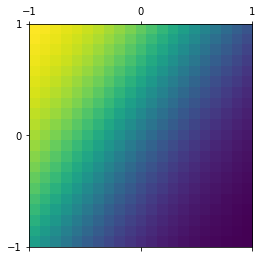

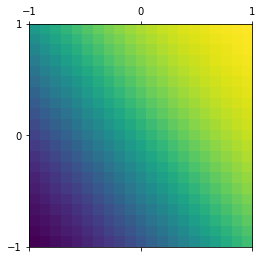

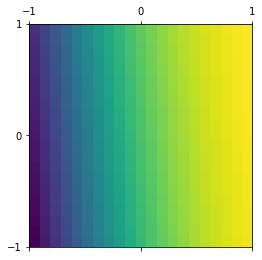

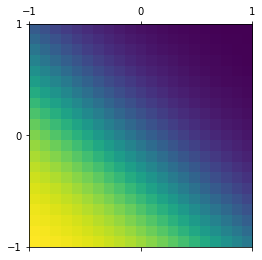

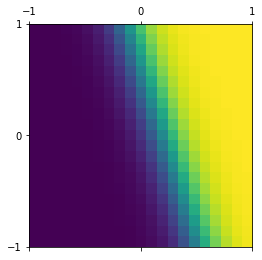

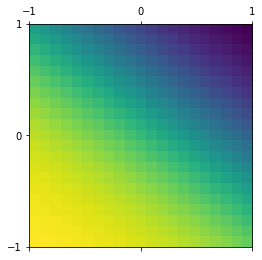

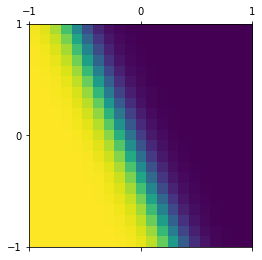

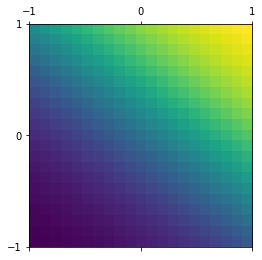

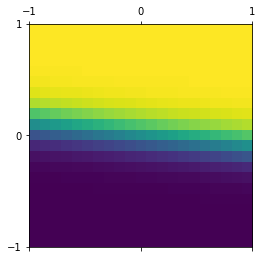

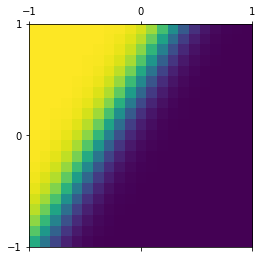

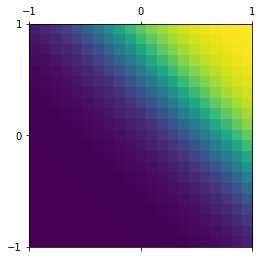

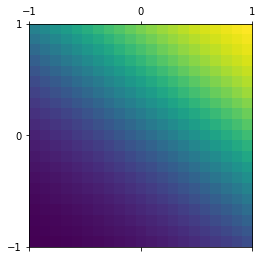

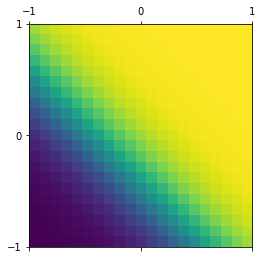

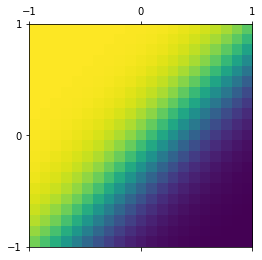

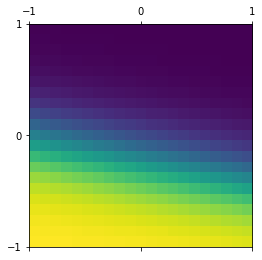

Layer 2 plots:


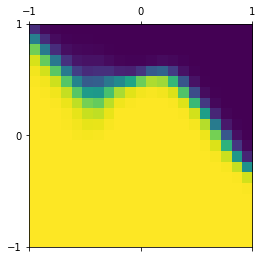

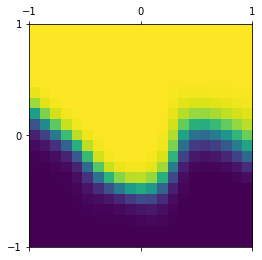

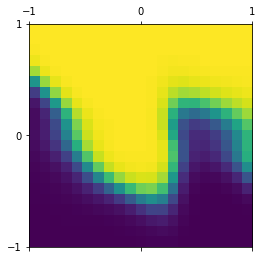

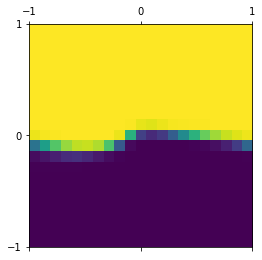

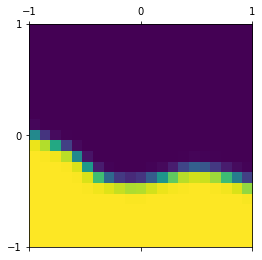

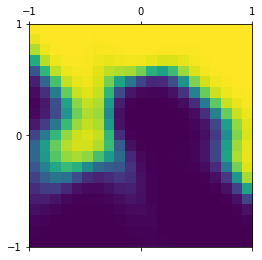

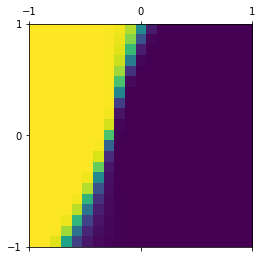

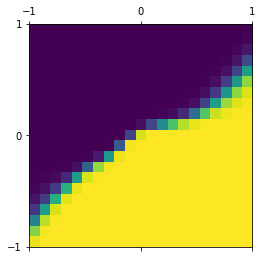

Layer 3 plots:


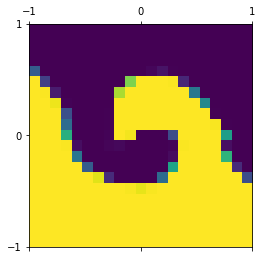

In [12]:
step_size = 0.1
start = -1
end = 1
num_layers = num_layers
x = np.arange(start, end + step_size, step_size)
y = np.arange(start, end + step_size, step_size)
xx, yy = np.meshgrid(x, y)   # xx and yy are matrices

# construct n x 2 array as input.
mesh_input = np.concatenate((xx.reshape(-1, 1), yy.reshape(-1, 1)), 1)

# note: (layer number) 0 = first hidden, 1 = second hidden (or output, depending on the model architecture), etc.
for layer_idx in range(num_layers):
    print(f'Layer {layer_idx + 1} plots:')
    # Retrieve hidden layer activity
    final = Model(inputs=model.input, outputs=model.layers[layer_idx].output)
    final_output = final.predict(mesh_input)
    num_hidden_units = final_output.shape[1]
    for hidden_unit_idx in range(num_hidden_units):
        # Plots etrieves all i-th hidden unit activation values
        plt.matshow(final_output[0:, hidden_unit_idx].reshape(21,21),
                    extent=[start, end, start, end], origin='lower')
        plt.show()

In [13]:
final_output = np.where(result>0.5,1,-1)
print(final_output)

[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1]
 [-1